In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 133s 1us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

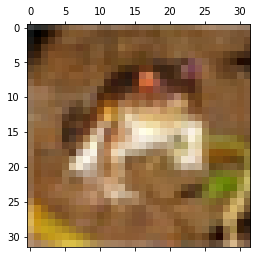

In [5]:
plt.matshow(X_train[0])

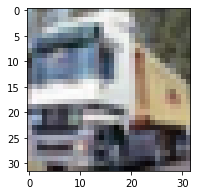

In [8]:
plt.figure(figsize = (15,3))
plt.imshow(X_train[1])

In [9]:
y_train[:5]  #this is 2 dimensional 

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1,) #we convert 2 dimensions into one dimension
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
classes[9]

'truck'

In [13]:
def plot_sample(X,y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

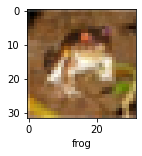

In [14]:
plot_sample(X_train, y_train, 0)

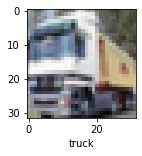

In [16]:
plot_sample(X_train, y_train, 1)

In [17]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [21]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(
optimizer = 'SGD',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 80s 50ms/step - loss: 1.8160 - accuracy: 0.3520
Epoch 2/5
1563/1563 [==============================] - 79s 51ms/step - loss: 1.6261 - accuracy: 0.4240
Epoch 3/5
1563/1563 [==============================] - 82s 52ms/step - loss: 1.5445 - accuracy: 0.45470s - loss: 1.5449 
Epoch 4/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4871 - accuracy: 0.4751
Epoch 5/5
1563/1563 [==============================] - 79s 51ms/step - loss: 1.4356 - accuracy: 0.4925


In [23]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 5s 13ms/step - loss: 1.4304 - accuracy: 0.4935 


[1.4304065704345703, 0.4934999942779541]

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.45      0.53      1000
           1       0.56      0.69      0.62      1000
           2       0.41      0.28      0.34      1000
           3       0.35      0.34      0.35      1000
           4       0.45      0.38      0.41      1000
           5       0.44      0.34      0.38      1000
           6       0.47      0.63      0.54      1000
           7       0.53      0.57      0.55      1000
           8       0.53      0.71      0.61      1000
           9       0.52      0.54      0.53      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000



In [28]:
cnn = models.Sequential([
    ##cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [29]:
cnn.compile(optimizer='adam',
             loss ='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [30]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.4486 - accuracy: 0.4800
Epoch 2/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.0956 - accuracy: 0.6148
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9708 - accuracy: 0.6614
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8895 - accuracy: 0.6919
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8227 - accuracy: 0.7142
Epoch 6/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7696 - accuracy: 0.7318
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7214 - accuracy: 0.7498
Epoch 8/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.6780 - accuracy: 0.7641
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6395 - accuracy: 0.7757
Epoch 10/10
1563/1563 [==============================] - 43s 27m

In [31]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9339 - accuracy: 0.6998


[0.9338583946228027, 0.6998000144958496]

In [32]:
y_test = y_test.reshape(-1,) #here we convert 2D into 1D array
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

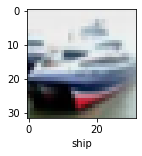

In [33]:
plot_sample(X_test, y_test, 1)

In [34]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.06967127e-05, 5.15076863e-05, 3.88812259e-05, 9.59217250e-01,
        1.25096907e-04, 3.68248858e-02, 3.23222019e-03, 4.74358740e-06,
        4.87086538e-04, 7.66097401e-06],
       [2.03314866e-03, 1.23506255e-01, 3.74624142e-05, 9.34209766e-06,
        1.77320402e-07, 1.31802878e-07, 3.47302169e-08, 2.53818366e-09,
        8.74403894e-01, 9.52625396e-06],
       [8.23330954e-02, 5.02827108e-01, 3.91934626e-03, 3.03258579e-02,
        1.20574841e-03, 1.00470418e-02, 6.46592584e-04, 1.30893168e-04,
        3.62341285e-01, 6.22297823e-03],
       [9.74682391e-01, 3.27444309e-03, 4.01904853e-03, 1.05719524e-03,
        3.56325967e-04, 2.84618659e-06, 2.20900896e-04, 9.12879259e-05,
        1.62567552e-02, 3.88689950e-05],
       [5.15497675e-07, 1.15526248e-07, 5.22232242e-03, 7.25717284e-03,
        2.61995405e-01, 1.32370871e-04, 7.25387275e-01, 3.91742515e-06,
        3.98790434e-07, 3.79763179e-07]], dtype=float32)

In [40]:
##for element in y_pred:
#    print(np.argmax(element))
    

In [41]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [42]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

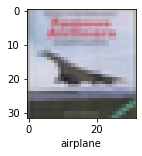

In [43]:
plot_sample(X_test, y_test, 3)

In [44]:
classes[y_classes[3]]

'airplane'

In [46]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      1000
           1       0.77      0.84      0.80      1000
           2       0.65      0.54      0.59      1000
           3       0.46      0.57      0.51      1000
           4       0.71      0.59      0.65      1000
           5       0.59      0.63      0.61      1000
           6       0.72      0.83      0.77      1000
           7       0.77      0.72      0.75      1000
           8       0.84      0.79      0.81      1000
           9       0.80      0.76      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

